# 1. Chargement et exploration des données

In [1]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
 

# config de seaborn pour les graphiques
sns.set(style="whitegrid")



In [2]:
# générer les données

np.random.seed(42)

data_lenght = 500

age = np.random.randint(18, 60,size = data_lenght)
sexe = np.random.randint(0, 2, size = data_lenght)
imc = np.random.uniform(18, 40,size = data_lenght).round(2)

 # variation du revenu annuel: plage de 20000 à 50000 dollars
revenu_annuel = np.random.uniform(20000, 50000,size = data_lenght).round(2)

maladie_chronique = np.random.binomial(1, p = 0.3, size = data_lenght)

cout_medical = (4000 + (age*10) + (imc*200) + (maladie_chronique*4000) + np.random.normal(0,500,size=data_lenght)).round(2)


In [3]:
# CREATION DU DATAFRAME
data = pd.DataFrame({
    "Age": age,
    "Sexe": sexe,
    "IMC": imc,
    "Revenu_Annuel": revenu_annuel,
    "Maladie_Chronique": maladie_chronique,
    "Cout_Medical": cout_medical
    
}
)

In [4]:
data.head()

,Age,Sexe,IMC,Revenu_Annuel,Maladie_Chronique,Cout_Medical
0,56,0,31.06,43922.78,0,9711.07
1,46,1,32.94,39753.56,1,14744.09
2,32,0,35.36,45517.45,1,16040.50
3,25,0,28.97,46018.83,1,14032.57
4,38,0,19.91,41250.89,0,7862.35


In [20]:
# verification des données manquantes
data.isnull().sum()

Age                  0
Sexe                 0
IMC                  0
Revenu_Annuel        0
Maladie_Chronique    0
Cout_Medical         0
dtype: int64

# 2. Preparation des données

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[["Age","IMC","Revenu_Annuel"]] = scaler.fit_transform(data[["Age","IMC","Revenu_Annuel"]])

In [6]:
df=data[["Age","IMC","Revenu_Annuel"]].head()

# Visualisation

## distribution des variable

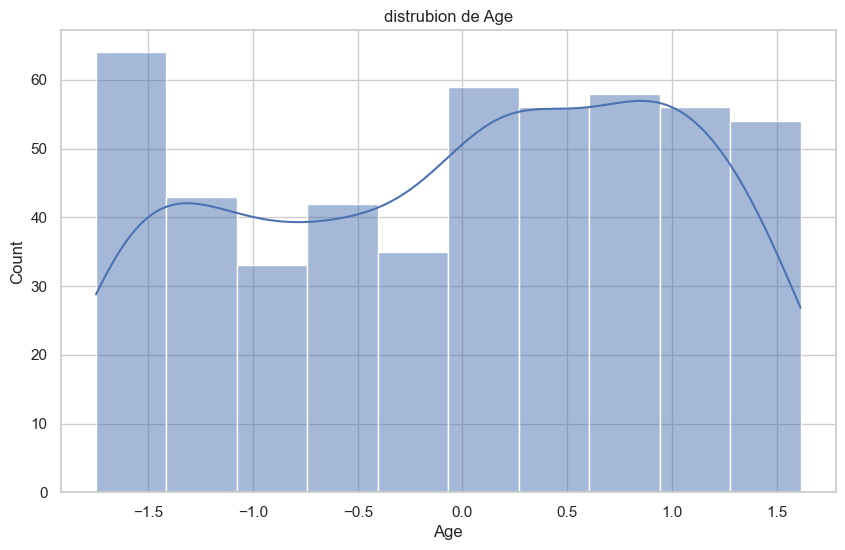

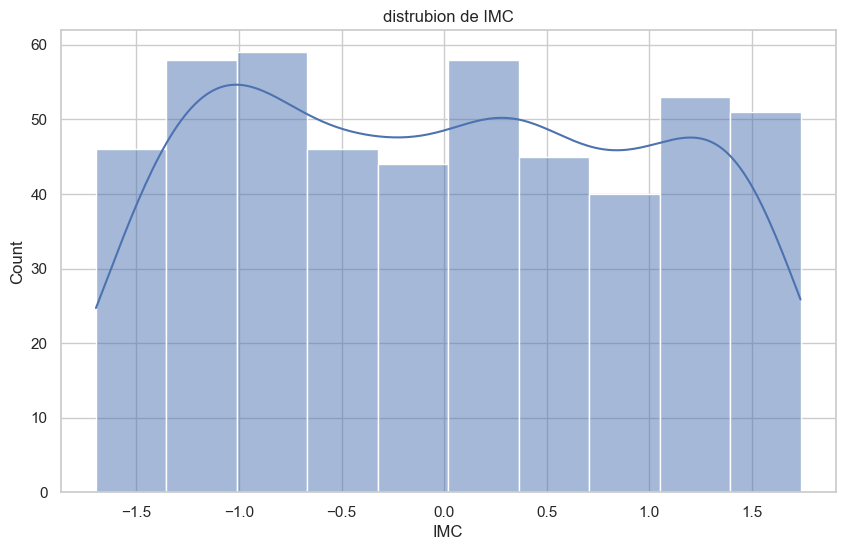

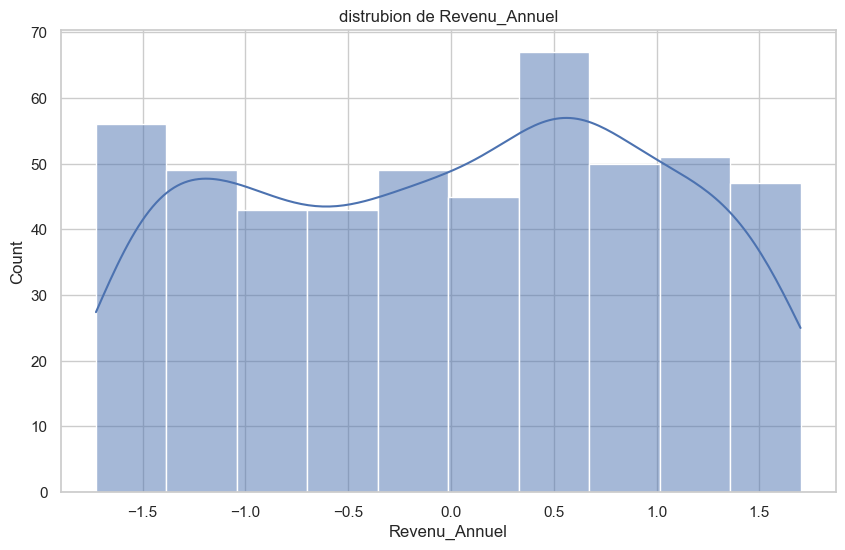

In [36]:
### distribution de l'age

for column in df.columns :
    plt.figure(figsize=(10,6))
    sns.histplot(data[column],kde=True)
    plt.title(f"distrubion de {column}");

# correlation

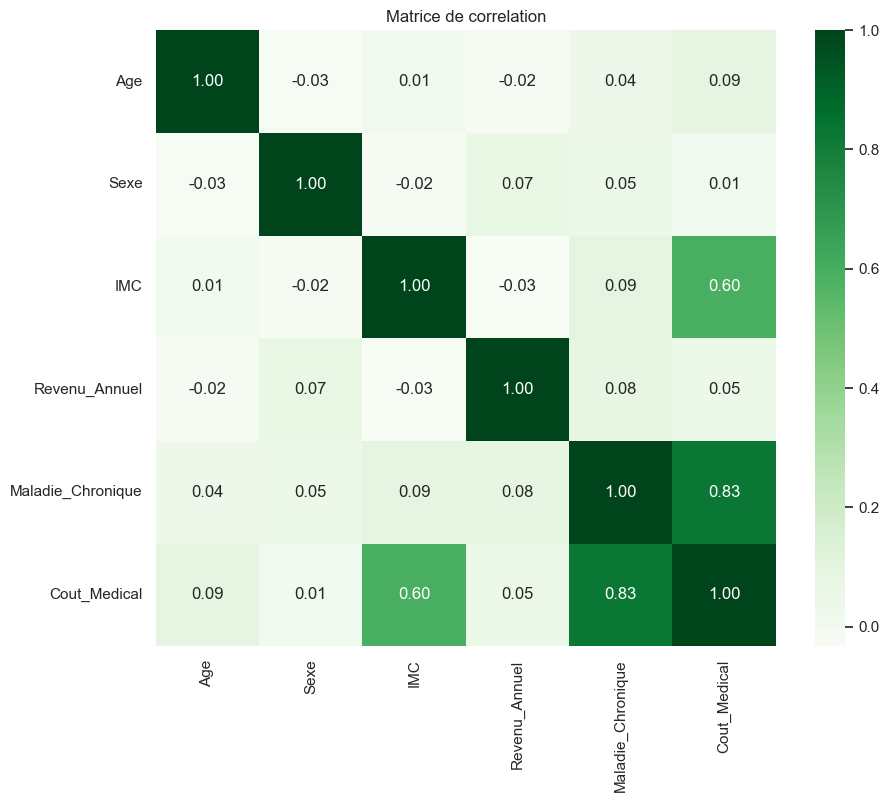

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot= True, cmap="Greens", fmt = ".2f")
plt.title("Matrice de correlation");


# 3. Prediction du cout médical : regression linéaire

In [7]:
# separation des donnéesjk
x_lin = data[["Age","Sexe","IMC","Revenu_Annuel","Maladie_Chronique"]]
y_lin = data [["Cout_Medical"]]


In [8]:
# division en ensemble et de test
x_train_lin, x_test_lin, y_train_lin, y_test_lin = train_test_split(x_lin, y_lin, test_size=0.2, random_state=42)

In [9]:
# Entrainement du modèle

reg_lin = LinearRegression()
reg_lin.fit(x_train_lin, y_train_lin)


LinearRegression()

In [10]:
reg_lin.score(x_train_lin, y_train_lin)

0.9632210435818085

# Evaluation du modèle


In [11]:
# predictions
y_pred_lin=reg_lin.predict(x_test_lin)
y_pred_lin

array([[15903.21189979],
       [11127.23087124],
       [15000.93874267],
       [12741.87449684],
       [ 8549.44257171],
       [14413.61911425],
       [12011.38385404],
       [ 8234.84189526],
       [ 9337.72878458],
       [ 8921.26554684],
       [12468.605992  ],
       [ 8098.71431631],
       [11865.66062833],
       [ 8644.8683422 ],
       [14435.30992487],
       [ 8191.73989906],
       [ 9629.40718002],
       [ 8310.94326794],
       [13289.28955914],
       [16562.44226489],
       [11722.53647005],
       [14440.4813544 ],
       [ 9076.62263712],
       [15840.7307245 ],
       [ 8304.24184005],
       [15571.43574005],
       [10469.58160554],
       [ 9969.3005696 ],
       [10194.7687441 ],
       [ 9425.73792778],
       [11955.1286414 ],
       [ 8138.46772348],
       [10398.82404277],
       [ 9572.01075326],
       [15465.82164179],
       [14417.71087817],
       [ 9225.60458537],
       [11770.26962635],
       [ 8643.84349562],
       [11108.93302724],


In [14]:
# evaluation de l'erreur
error = mean_squared_error(y_lin,y_pred_lin)

ValueError: Found input variables with inconsistent numbers of samples: [500, 100]

In [13]:
error

251568.42184807773